In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for classification problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings('ignore')

In [3]:
# load the titanic Dataset with a few variables for demonstration

data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic_train.csv', usecols=['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,1,NaN,27.14
1,0,NaN,13.35
2,0,0.33,71.29
3,0,19.00,13.04
4,1,25.00,7.76


In [4]:
# percentage of NA

data.isnull().mean()

Survived    0.00000
Age         0.03292
Fare        0.00134
dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((70000, 3), (30000, 3))

In [6]:
def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)
    
    #random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [7]:
median = X_train.Age.median()
print(median)
median_f = X_train.Fare.median()
print(median_f)

39.0
24.44


In [8]:
impute_na(X_train, 'Age', median)
X_train.head(20)
impute_na(X_train, 'Fare', median_f)
X_train.head(15)

,Survived,Age,Fare,Age_median,Age_zero,Age_random,Fare_median,Fare_zero,Fare_random
42865,0,31.0,6.51,31.0,31.0,31.0,6.51,6.51,6.51
91446,0,35.0,7.74,35.0,35.0,35.0,7.74,7.74,7.74
66374,0,34.0,7.16,34.0,34.0,34.0,7.16,7.16,7.16
79106,0,64.0,85.00,64.0,64.0,64.0,85.00,85.00,85.00
13404,1,48.0,27.80,48.0,48.0,48.0,27.80,27.80,27.80
39047,0,74.0,25.42,74.0,74.0,74.0,25.42,25.42,25.42
5475,0,59.0,23.32,59.0,59.0,59.0,23.32,23.32,23.32
64029,1,45.0,250.56,45.0,45.0,45.0,250.56,250.56,250.56
4851,1,42.0,24.64,42.0,42.0,42.0,24.64,24.64,24.64
7112,0,53.0,6.40,53.0,53.0,53.0,6.40,6.40,6.40


# Random sampling preserves the original distribution of the variable

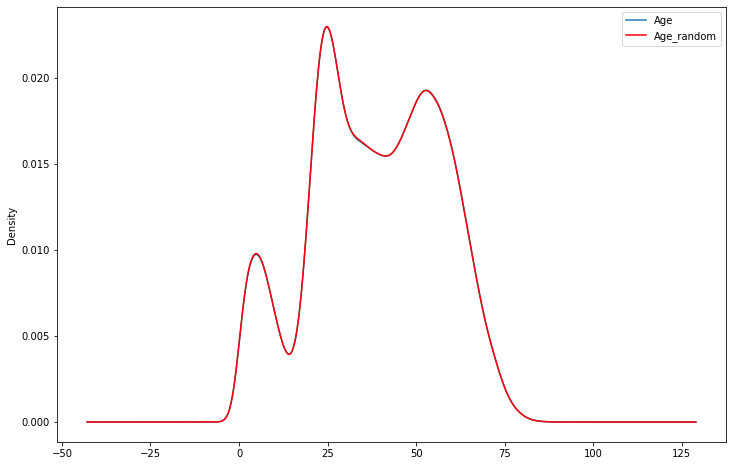

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

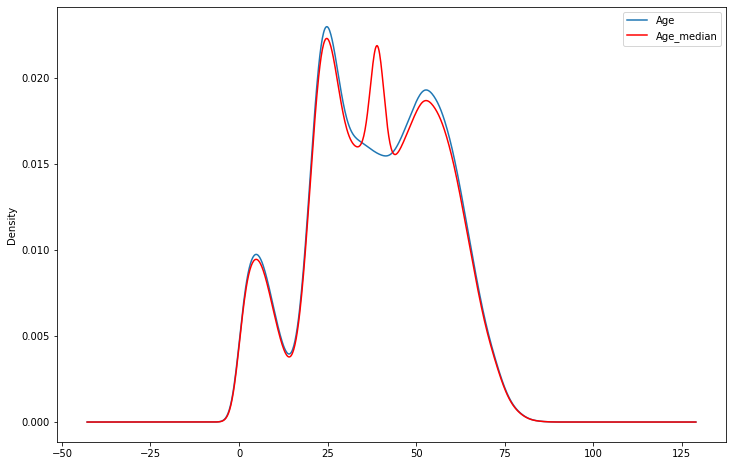

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

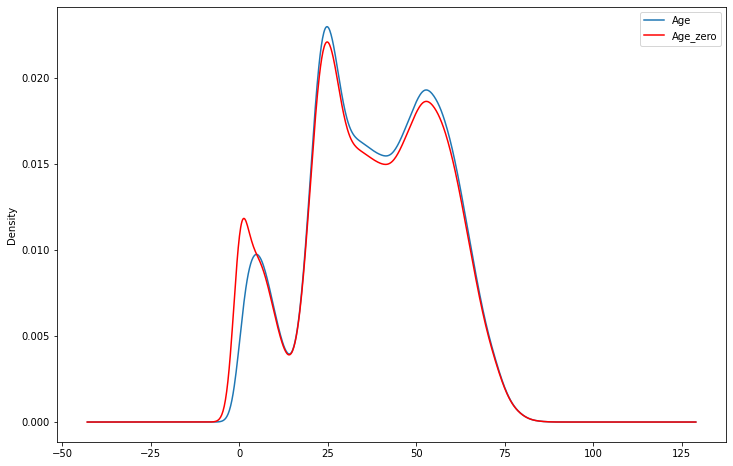

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')